# ResNet

- **Training set**: LO_SARD102
- **Test/Validation set:** LO_SARD102
- **Features**: word2vec sequence
- **Class imbalance processing**: SMOTE

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import applications
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import *
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import classification_report

X_train = np.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_SMOTE_X_train.npy', mmap_mode='r')
Y_train = np.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_SMOTE_Y_train.npy', mmap_mode='r')

X_val = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_X_val.npy', mmap_mode='r')
Y_val = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_Y_val.npy', mmap_mode='r')

X_test =  numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_X_test.npy',  mmap_mode='r')
Y_test =  numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_Y_test.npy',  mmap_mode='r')

print("Y_train:")
print(Counter(Y_train))
print(X_train.shape)
print(Y_train.shape)

print("\nY_val:")
print(Counter(Y_val))
print(X_val.shape)
print(Y_val.shape)

print("\nY_test:")
print(Counter(Y_test))
print(X_test.shape)
print(Y_test.shape)

train_gen = ResNetDataGenerator(_X=X_train, _y=Y_train, batch_size=512)
val_gen =   ResNetDataGenerator(_X=X_val,   _y=Y_val,   batch_size=512)
test_gen =  ResNetDataGenerator(_X=X_test,  _y=Y_test,  batch_size=512)

Y_train:
Counter({0.0: 95746, 1.0: 95746})
(191492, 100, 100)
(191492,)

Y_val:
Counter({0.0: 31975, 1.0: 1240})
(33215, 100, 100)
(33215,)

Y_test:
Counter({0.0: 31916, 1.0: 1299})
(33215, 100, 100)
(33215,)


## Build & train keras model

In [2]:
# https://keras.io/api/applications/resnet/#resnet50-function
model = applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(100, 100, 1),
    pooling=None,
    classes=2
)

sgd = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.95)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(train_gen,
                    epochs=8,
                    verbose=True,
                    validation_data=val_gen
                   )

Epoch 1/8
375/375 [==============================] - 192s 512ms/step - loss: 3.5788 - accuracy: 0.5508 - val_loss: 1.1111 - val_accuracy: 0.0665
Epoch 2/8
375/375 [==============================] - 192s 512ms/step - loss: 0.8936 - accuracy: 0.4985 - val_loss: 0.6864 - val_accuracy: 0.0721
Epoch 3/8
375/375 [==============================] - 192s 512ms/step - loss: 0.8838 - accuracy: 0.5059 - val_loss: 0.4663 - val_accuracy: 0.9604
Epoch 4/8
375/375 [==============================] - 192s 512ms/step - loss: 0.3775 - accuracy: 0.8324 - val_loss: 1.5823 - val_accuracy: 0.9542
Epoch 5/8
375/375 [==============================] - 192s 512ms/step - loss: 0.1218 - accuracy: 0.9729 - val_loss: 0.1666 - val_accuracy: 0.9592
Epoch 6/8
375/375 [==============================] - 192s 511ms/step - loss: 0.1620 - accuracy: 0.9485 - val_loss: 1.0677 - val_accuracy: 0.9294
Epoch 7/8
375/375 [==============================] - 192s 512ms/step - loss: 0.1950 - accuracy: 0.9558 - val_loss: 0.1873 - val_ac

## Evaluation

Instructions for updating:
Please use Model.predict, which supports generators.
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     31916
         1.0       0.20      0.05      0.08      1299

    accuracy                           0.95     33215
   macro avg       0.58      0.52      0.53     33215
weighted avg       0.93      0.95      0.94     33215

Confusion matrix:
[[31654   262]
 [ 1235    64]]

Confusion matrix (Percentages):
[[95.3    0.789]
 [ 3.718  0.193]]

Metrics:
Sensitivity (TPR): 0.049269
Specifity (TNR):   0.991791

FPR: 0.008209
FNR: 0.950731

Balanced accuracy: 0.520530

Test loss:	0.214347
Test accuracy:	0.954930


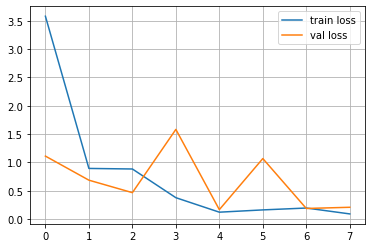

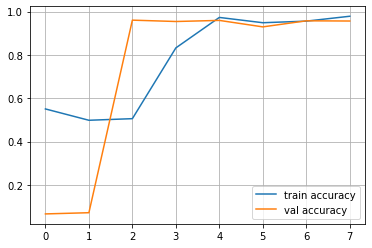

In [3]:
Y_pred = numpy.argmax( model.predict_generator(test_gen) , axis=1 )

print(classification_report(Y_test, Y_pred))
print_metrics(confusion_matrix(Y_test, Y_pred), Y_test)
print()
score = model.evaluate(test_gen, verbose=False)
print('Test loss:\t{:.6f}'.format(score[0]))
print('Test accuracy:\t{:.6f}'.format(score[1]))

plot_loss(history)
plot_accuracy(history)

In [4]:
model.save('ResNet_word2vec_SMOTE.h5')